# Pandas Documentation on Group By

In this notebook, you will work through the Pandas documentation on "group by".

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## Pandas group by: split-apply-combine

In this notebook, you are going to learn how to use Pandas by typing the code from the Pandas documentation into this notebook.

* Go to the Pandas Documentation for [Group By](http://pandas.pydata.org/pandas-docs/stable/groupby.html#group-by-split-apply-combine).
* Type all of the code from that section of the documentation into this notebook and get it working.
* **To learn this API well, you must type the code rather than copy and pasting it**.
* Create a new cell in this section for each `In[]` prompt in the documentation.
* Ignore the cells in the **Grading** section below.
* No Markdown comments are needed.
* Skip the following sub-sections:
  - Grouping with a Grouper specification
  - Plotting
  - Examples

## Grading

YOUR ANSWER HERE

In [2]:
df = pd.DataFrame({'A' : ['foo','bar','foo','bar','foo','bar','foo','foo'],
                   'B' : ['one','one','two','three','two','two','one','three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)
        
    })

In [3]:
df

,A,B,C,D
0,foo,one,-0.494316,1.136269
1,bar,one,0.318411,0.393906
2,foo,two,0.713358,-0.292599
3,bar,three,0.897419,-0.729185
4,foo,two,-0.555437,0.893927
5,bar,two,0.640335,-0.145323
6,foo,one,0.457887,0.979322
7,foo,three,2.264235,0.342337


In [4]:
grouped=df.groupby('A')

In [5]:
grouped=df.groupby(['A','B'])

In [6]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [7]:
grouped = df.groupby(get_letter_type,axis=1)

In [8]:
lst=[1,2,3,1,2,3]

In [9]:
s = pd.Series([1,2,3,10,20,30],lst)

In [10]:
grouped=s.groupby(level=0)

In [11]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [12]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [13]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

In [14]:
df2=pd.DataFrame({'X':['B','B','A','A'], 'Y':[1,2,3,4]})

In [15]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [16]:
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


In [17]:
df3 = pd.DataFrame({'X':['A','B','A','B'],'Y':[1,4,3,2]})

In [18]:
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [19]:
df3.groupby(['X']).get_group('B')

,X,Y
1,B,4
3,B,2


In [20]:
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [21]:
df.groupby(get_letter_type,axis=1).groups

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [22]:
grouped = df.groupby(['A','B'])

In [23]:
grouped.groups

{('bar', 'one'): [1],
 ('bar', 'three'): [3],
 ('bar', 'two'): [5],
 ('foo', 'one'): [0, 6],
 ('foo', 'three'): [7],
 ('foo', 'two'): [2, 4]}

In [24]:
len(grouped)

6

In [25]:
n=10

In [26]:
weight=np.random.normal(166,20,size=n)

In [27]:
height=np.random.normal(60,10,size=n)

In [28]:
time=pd.date_range('1/1/2000',periods=n)

In [29]:
gender=np.random.choice(['male','female'],size=n)

In [30]:
df=pd.DataFrame({'height':height,'weight':weight,
                 'gender': gender},index=time)

In [31]:
df

,gender,height,weight
2000-01-01,female,69.493416,180.417500
2000-01-02,male,48.730135,186.345093
2000-01-03,male,76.482586,137.941054
2000-01-04,male,62.906186,193.380427
2000-01-05,male,53.587860,165.964457
2000-01-06,female,63.429175,158.403500
2000-01-07,male,53.450752,166.230785
2000-01-08,male,55.780059,142.593642
2000-01-09,male,70.412781,197.791922
2000-01-10,male,54.673312,174.031915


In [32]:
gb=df.groupby('gender')

In [33]:
df=pd.DataFrame({'A':['foo','bar','foo','bar',
                      'foo','bar','foo','foo'],
                 'B':['one','one','two','three',
                      'two','two','one','three'],
                 'C':np.random.randn(8),
                 'D':np.random.randn(8)})

In [34]:
arrays=[['bar','bar','baz','baz','foo','foo','qux','qux'],
       ['one','two','one','two','one','two','one','two']]

In [35]:
index=pd.MultiIndex.from_arrays(arrays,names=['first','second'])

In [36]:
s=pd.Series(np.random.randn(8),index=index)

In [37]:
s

first  second
bar    one       0.266579
       two       2.027556
baz    one      -0.671132
       two       0.159434
foo    one      -0.752350
       two      -0.592566
qux    one      -0.314592
       two      -0.499887
dtype: float64

In [38]:
grouped=s.groupby(level=0)

In [39]:
grouped.sum()

first
bar    2.294136
baz   -0.511698
foo   -1.344916
qux   -0.814479
dtype: float64

In [40]:
s.groupby(level='second').sum()

second
one   -1.471495
two    1.094537
dtype: float64

In [41]:
s.sum(level='second')

second
one   -1.471495
two    1.094537
dtype: float64

In [42]:
arrays=[['bar','bar','baz','baz','foo','foo','qux','qux'],
        ['doo','doo','bee','bee','bop','bop','bop','bop'],
        ['one','two','one','two','one','two','one','two']]

In [43]:
tuples=list(zip(*arrays))

In [44]:
index=pd.MultiIndex.from_tuples(tuples,names=['first','second','third'])

In [45]:
s=pd.Series(np.random.randn(8),index=index)

In [46]:
s

first  second  third
bar    doo     one      1.893824
               two     -0.762169
baz    bee     one      0.802939
               two     -1.008258
foo    bop     one     -1.019183
               two      0.206513
qux    bop     one      0.016061
               two      1.257091
dtype: float64

In [47]:
s.groupby(level=['first','second']).sum()

first  second
bar    doo       1.131655
baz    bee      -0.205320
foo    bop      -0.812669
qux    bop       1.273151
dtype: float64

In [48]:
grouped=df.groupby(['A'])

In [49]:
grouped_C=grouped['C']

In [50]:
grouped_D=grouped['D']

In [51]:
df['C'].groupby(df['A'])

In [52]:
grouped=df.groupby('A')

In [53]:
for name,group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one  0.122872 -0.703446
3  bar  three -0.275430 -0.062637
5  bar    two  1.110918  0.139807
foo
     A      B         C         D
0  foo    one  0.392851  0.765578
2  foo    two -0.108455 -0.548259
4  foo    two  0.246715 -1.136588
6  foo    one  0.176286  1.142263
7  foo  three  0.158398 -1.244453


In [54]:
for name,group in df.groupby(['A','B']):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  0.122872 -0.703446
('bar', 'three')
     A      B        C         D
3  bar  three -0.27543 -0.062637
('bar', 'two')
     A    B         C         D
5  bar  two  1.110918  0.139807
('foo', 'one')
     A    B         C         D
0  foo  one  0.392851  0.765578
6  foo  one  0.176286  1.142263
('foo', 'three')
     A      B         C         D
7  foo  three  0.158398 -1.244453
('foo', 'two')
     A    B         C         D
2  foo  two -0.108455 -0.548259
4  foo  two  0.246715 -1.136588


In [55]:
grouped.get_group('bar')

,A,B,C,D
1,bar,one,0.122872,-0.703446
3,bar,three,-0.275430,-0.062637
5,bar,two,1.110918,0.139807


In [56]:
df.groupby(['A','B']).get_group(('bar','one'))

,A,B,C,D
1,bar,one,0.122872,-0.703446


In [57]:
grouped=df.groupby('A')

In [58]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,0.958360,-0.626276
foo,0.865794,-1.021457


In [59]:
grouped=df.groupby(['A','B'])

In [60]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one    0.122872 -0.703446
    three -0.275430 -0.062637
    two    1.110918  0.139807
foo one    0.569137  1.907842
    three  0.158398 -1.244453
    two    0.138260 -1.684846

In [61]:
grouped=df.groupby(['A','B'],as_index=False)

In [62]:
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,0.122872,-0.703446
1,bar,three,-0.275430,-0.062637
2,bar,two,1.110918,0.139807
3,foo,one,0.569137,1.907842
4,foo,three,0.158398,-1.244453
5,foo,two,0.138260,-1.684846


In [63]:
df.groupby('A',as_index=False).sum()

,A,C,D
0,bar,0.958360,-0.626276
1,foo,0.865794,-1.021457


In [64]:
df.groupby(['A','B']).sum().reset_index()

,A,B,C,D
0,bar,one,0.122872,-0.703446
1,bar,three,-0.275430,-0.062637
2,bar,two,1.110918,0.139807
3,foo,one,0.569137,1.907842
4,foo,three,0.158398,-1.244453
5,foo,two,0.138260,-1.684846


In [65]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [66]:
grouped.describe()

C         D
0 count  1.000000  1.000000
  mean   0.122872 -0.703446
  std         NaN       NaN
  min    0.122872 -0.703446
  25%    0.122872 -0.703446
  50%    0.122872 -0.703446
  75%    0.122872 -0.703446
  max    0.122872 -0.703446
1 count  1.000000  1.000000
  mean  -0.275430 -0.062637
  std         NaN       NaN
  min   -0.275430 -0.062637
  25%   -0.275430 -0.062637
  50%   -0.275430 -0.062637
  75%   -0.275430 -0.062637
  max   -0.275430 -0.062637
2 count  1.000000  1.000000
  mean   1.110918  0.139807
  std         NaN       NaN
  min    1.110918  0.139807
  25%    1.110918  0.139807
  50%    1.110918  0.139807
  75%    1.110918  0.139807
  max    1.110918  0.139807
3 count  2.000000  2.000000
  mean   0.284568  0.953921
  std    0.153135  0.266357
  min    0.176286  0.765578
  25%    0.230427  0.859749
  50%    0.284568  0.953921
  75%    0.338710  1.048092
  max    0.392851  1.142263
4 count  1.000000  1.000000
  mean   0.158398 -1.244453
  std         NaN       NaN
  min    0.158398 -1.244453
  25%    0.158398 -1.244453
  50%    0.158398 -1.244453
  75%    0.158398 -1.244453
  max    0.158398 -1.244453
5 count  2.000000  2.000000
  mean   0.069130 -0.842423
  std    0.251143  0.416012
  min   -0.108455 -1.136588
  25%   -0.019662 -0.989505
  50%    0.069130 -0.842423
  75%    0.157923 -0.695341
  max    0.246715 -0.548259

In [67]:
grouped=df.groupby('A')

In [68]:
grouped['C'].agg([np.sum,np.mean,np.std])

,sum,mean,std
A,,,
bar,0.958360,0.319453,0.713774
foo,0.865794,0.173159,0.182489


In [69]:
grouped['D'].agg({'result':np.sum,
                  'result2':np.mean})

,result2,result
A,,
bar,-0.208759,-0.626276
foo,-0.204291,-1.021457


In [70]:
grouped.agg([np.sum,np.mean,np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  0.958360  0.319453  0.713774 -0.626276 -0.208759  0.440208
foo  0.865794  0.173159  0.182489 -1.021457 -0.204291  1.098099

In [71]:
grouped.agg({'C':np.sum,
            'D':lambda x: np.std(x,ddof=1)})

,D,C
A,,
bar,0.440208,0.958360
foo,1.098099,0.865794


In [72]:
grouped.agg({'C':'sum','D':'std'})

,D,C
A,,
bar,0.440208,0.958360
foo,1.098099,0.865794


In [73]:
df.groupby('A').sum()

,C,D
A,,
bar,0.958360,-0.626276
foo,0.865794,-1.021457


In [74]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.122872 -0.703446
    three -0.275430 -0.062637
    two    1.110918  0.139807
foo one    0.284568  0.953921
    three  0.158398 -1.244453
    two    0.069130 -0.842423

In [75]:
index=pd.date_range('10/1/1999',periods=1100)

In [76]:
ts=pd.Series(np.random.normal(0.5,2,1100),index)

In [77]:
ts=pd.rolling_mean(ts,100,100).dropna()

In [78]:
ts.head()

2000-01-08    0.455723
2000-01-09    0.457310
2000-01-10    0.444737
2000-01-11    0.373628
2000-01-12    0.386799
Freq: D, dtype: float64

In [79]:
ts.tail()

2002-09-30    0.254702
2002-10-01    0.273529
2002-10-02    0.312873
2002-10-03    0.304792
2002-10-04    0.267760
Freq: D, dtype: float64

In [80]:
key=lambda x: x.year

In [81]:
zscore=lambda x:(x-x.mean())/x.std()

In [82]:
transformed=ts.groupby(key).transform(zscore)

In [83]:
grouped=ts.groupby(key)

In [84]:
grouped.mean()

2000    0.594182
2001    0.504538
2002    0.432854
dtype: float64

In [85]:
grouped.std()

2000    0.135731
2001    0.191107
2002    0.130765
dtype: float64

In [86]:
grouped_trans=transformed.groupby(key)

In [87]:
grouped_trans.mean()

2000   -8.179777e-17
2001    3.330669e-16
2002    1.354713e-16
dtype: float64

In [88]:
grouped_trans.std()

2000    1
2001    1
2002    1
dtype: float64

In [89]:
compare=pd.DataFrame({'Original':ts,'Transformed':transformed})

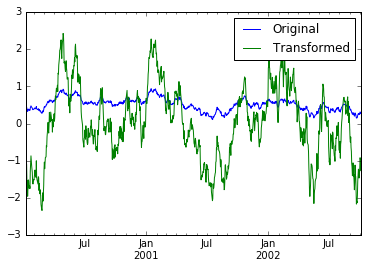

In [90]:
compare.plot()